<a href="https://colab.research.google.com/github/alissonxt/ExamenFinal2/blob/main/Copia_de_ExamenFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Pregunta1

In [101]:
"""
Establezca 2 modelos de clasificación para el data Iirs
"""
import numpy as np
import pandas as pd
from sklearn import neighbors,datasets
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.express as px

df_iris = px.data.iris()    
df_iris.head()

#Defines X, y
x1 = np.array(df_iris['sepal_length'])
x2 = np.array(df_iris['sepal_width'])
X = np.c_[x1,x2]
y = np.array(df_iris['species_id'])
y = np.reshape(y,(len(y),1))
print(np.shape(X))
print(np.shape(y))

#Separación entre train y test
Xtrain,Xtest,ytrain,ytest = tts(X,y,test_size = 0.25, random_state = 42)

(150, 2)
(150, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


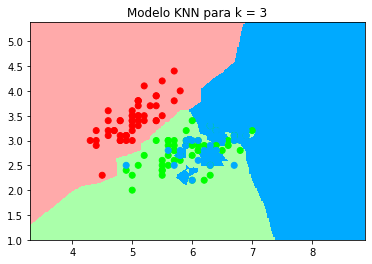

In [104]:
#Creamos el modelo 
modeloKNN = knn(n_neighbors=3)
modeloKNN.fit(Xtrain,ytrain)

# Gráfica
# Mapas de colores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# Calculamos min, max y los límites
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
np.arange(y_min, y_max, .02))

# predecimos
Z = modeloKNN.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Modelo KNN para k = 3")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


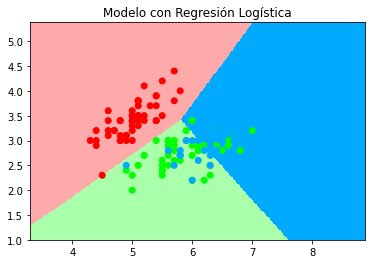

In [106]:
#Creamos el segundo modelo con LogisticRegression
from sklearn.linear_model import LogisticRegression
modeloLogistico = LogisticRegression(max_iter=60)
modeloLogistico.fit(Xtrain,ytrain)

# Graficamos
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# Calculamos min, max y los límites
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
np.arange(y_min, y_max, .02))

# prediciendo
Z2 = modeloLogistico.predict(np.c_[xx.ravel(), yy.ravel()])

Z2 = Z2.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z2, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Modelo con Regresión Logística")
plt.show()


###Pregunta2

In [107]:
"""
Evalúa 2 modelos: Uno con PCA y otro sin PCA para el modelo de clasificación del dataset melbournhouses
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

suburb_df=pd.read_csv('https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/melbournehouses.csv')
display(suburb_df.head())
suburb_df['Type'].unique() #Hay 3 tipos de suburbios

X = np.array(suburb_df.drop(columns = ['Suburb','Address','Method','SellerG','Date','CouncilArea','Regionname','Type']))


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [108]:
print(X[0,:])#Se deberá realizar un escalamiento de los datos

[ 2.000000e+00  1.480000e+06  2.500000e+00  3.067000e+03  2.000000e+00
  1.000000e+00  1.000000e+00  2.020000e+02           nan           nan
 -3.779960e+01  1.449984e+02  4.019000e+03]


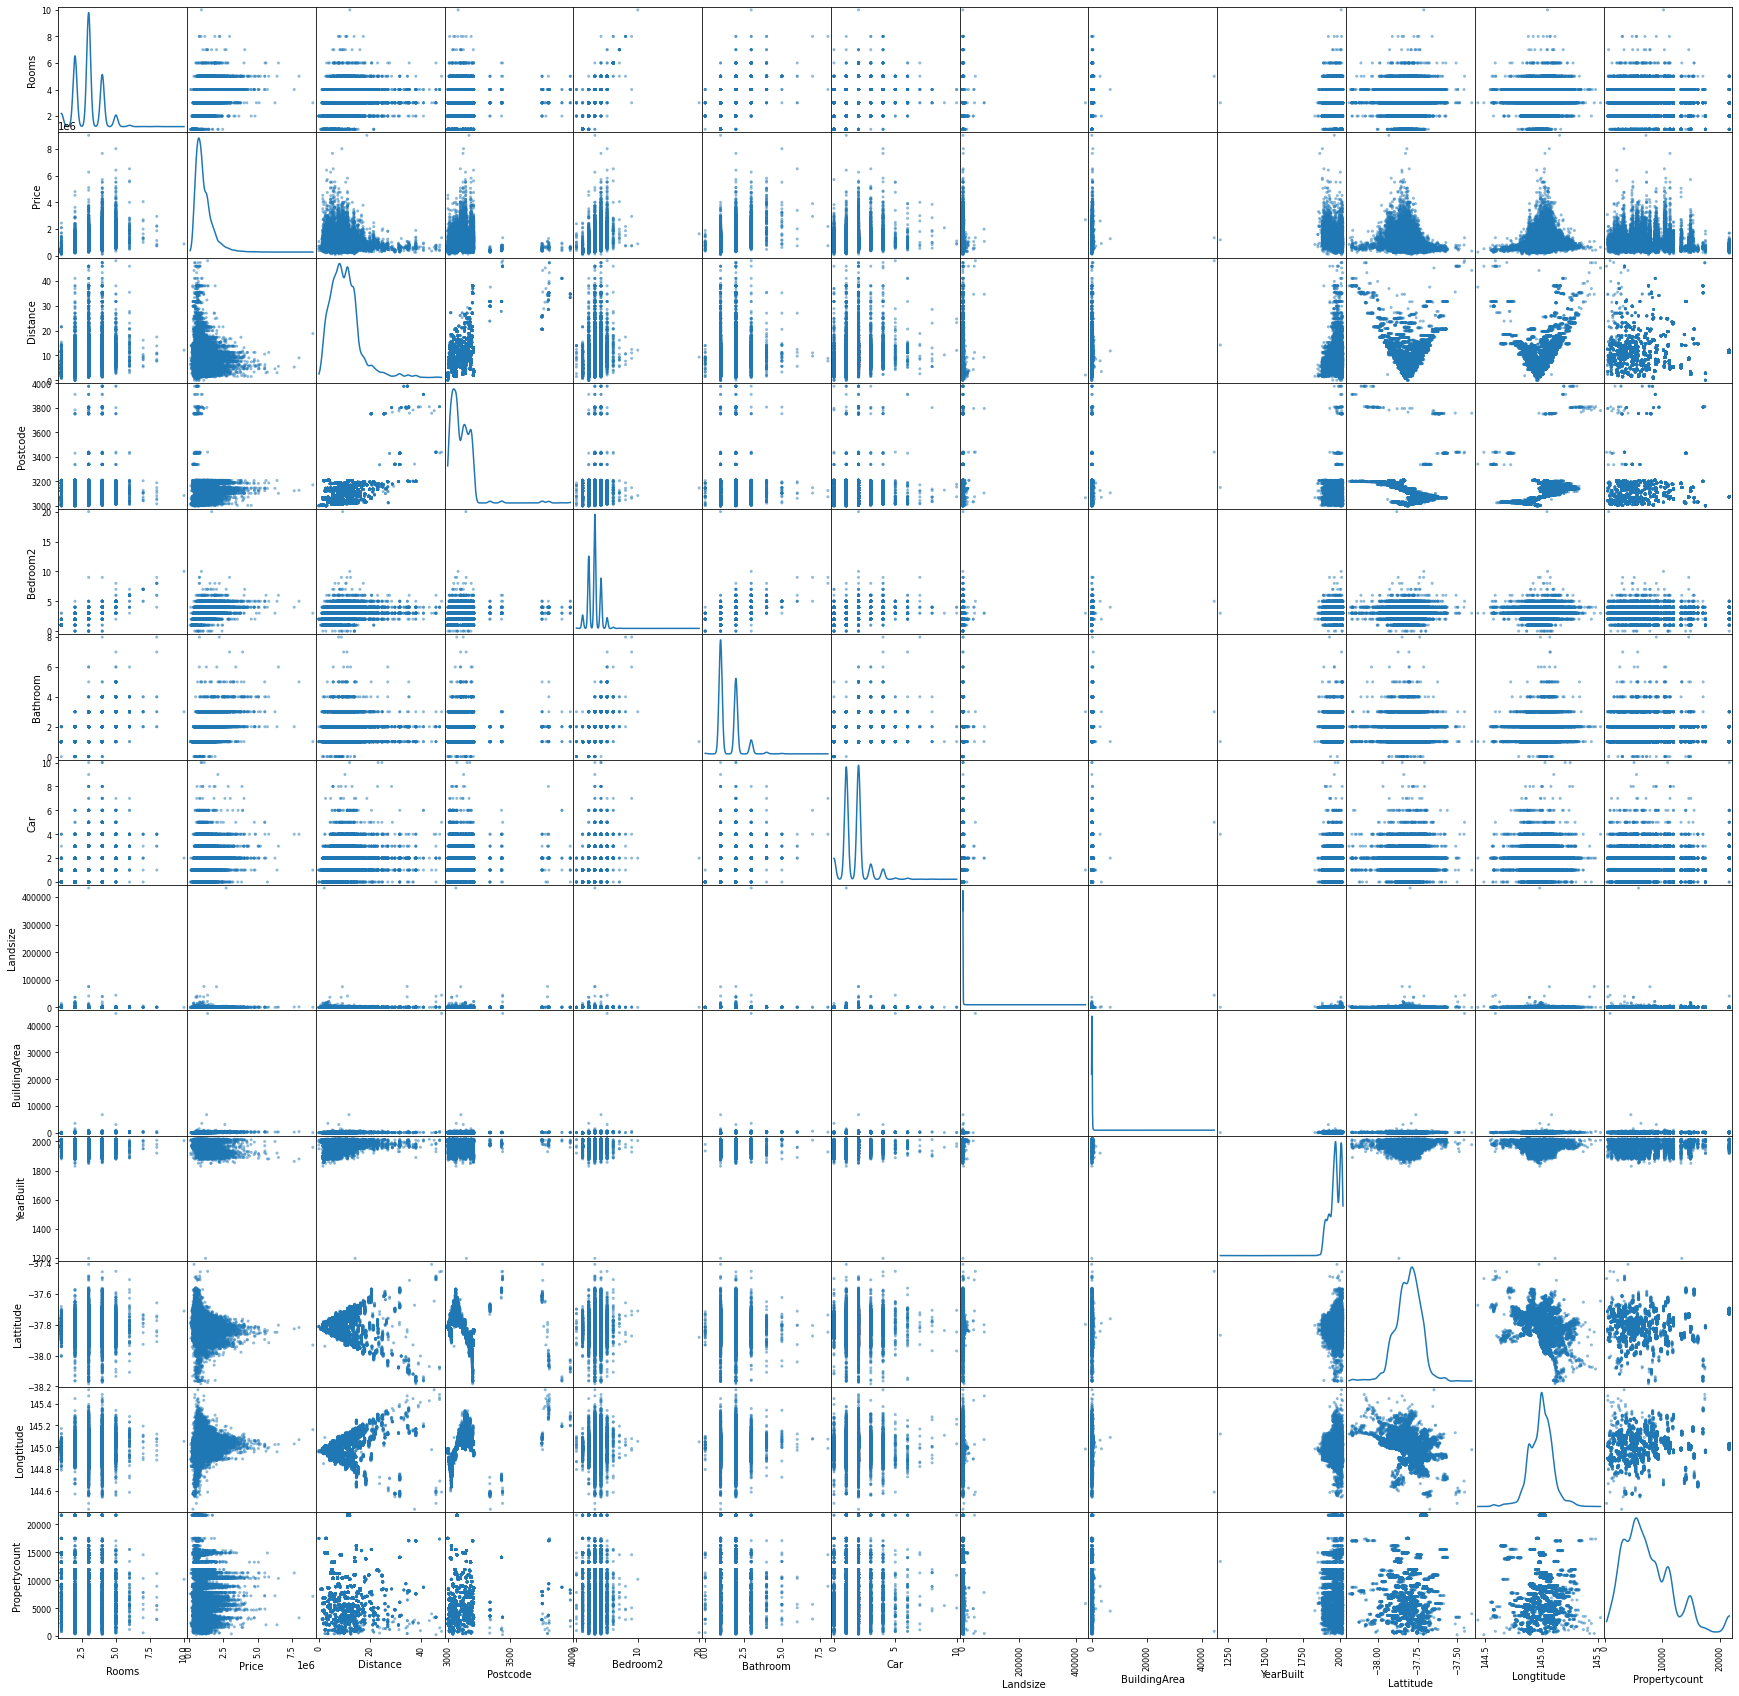

In [109]:
pd.plotting.scatter_matrix(suburb_df,figsize = (30,30) , diagonal = 'kde')
plt.show()

In [111]:
#Escalamiento
escalador = MinMaxScaler()
X_escalado = escalador.fit_transform(X)
#Visualizar el x escalado, la primera fila
print(X_escalado[0,:])

[1.11111111e-01 1.56477846e-01 5.19750520e-02 6.85772774e-02
 1.00000000e-01 1.25000000e-01 1.00000000e-01 4.66497619e-04
            nan            nan 4.94754658e-01 5.17651251e-01
 1.76159993e-01]


In [112]:
#Hacer el análisis de los componentes principales. 
from sklearn.decomposition import PCA
pca1 = PCA(n_components=2) # Reducción dimensional a 2 dimensiones
#Generar el valor de la matriz de autovectores
pca1.fit(X_escalado)
Xpca = pca1.transform(X_escalado)
print(np.shape(pca1.components_))

ValueError: ignored

###Pregunta3

In [91]:
"""
¿Existe sobreajuste al aplicar un modelo de RF con n = 200 para el modelo de wine.csv? 
"""
import pandas as pd
import numpy as np

ruta='/content/drive/MyDrive/Colab Notebooks/AD PYTHON 2/wine.xlsx'
paises_df=pd.read_excel(ruta)

from sklearn.preprocessing import LabelEncoder
Xlabel = np.array(paises_df['country'])
Encoder = LabelEncoder()
Encoder.fit(Xlabel)
Xcod = Encoder.fit_transform(Xlabel)

X_singen =paises_df.drop(columns = ['price','country','designation','description','province','region_1','region_2','variety','winery'])
X_singen['country']=Xcod

y=np.array(paises_df['price'])
y=np.reshape(y,(150930,1))
print(X_singen)

        Unnamed: 0  points  country
0                0      96       44
1                1      96       40
2                2      96       44
3                3      96       44
4                4      95       15
...            ...     ...      ...
150925      150925      91       22
150926      150926      91       15
150927      150927      91       22
150928      150928      90       15
150929      150929      90       22

[150930 rows x 3 columns]


In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xgenerado = np.array(X_singen)
X_scal =scaler.fit_transform(Xgenerado)
print(X_scal)

[[0.00000000e+00 8.00000000e-01 9.16666667e-01]
 [6.62563192e-06 8.00000000e-01 8.33333333e-01]
 [1.32512638e-05 8.00000000e-01 9.16666667e-01]
 ...
 [9.99986749e-01 5.50000000e-01 4.58333333e-01]
 [9.99993374e-01 5.00000000e-01 3.12500000e-01]
 [1.00000000e+00 5.00000000e-01 4.58333333e-01]]


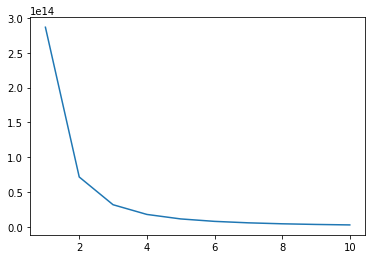

In [84]:
from sklearn.cluster import KMeans
inercia =[]
for i in range(1,11):
  k_means = KMeans(n_clusters = i)
  k_means.fit(X_singen)
  inercia.append(k_means.inertia_)
#Visualizar el codo de Jambu

plt.plot(range(1,11),inercia)

In [85]:
k_means2 = KMeans(n_clusters = 2) #Hay un codo en k=2
k_means2.fit(X_singen)
labels = k_means2.labels_

In [87]:
labels
np.shape(labels)

(150930,)

In [90]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import train_test_split as tts
Xtrain,Xtest, ytrain, ytest=tts(X_singen,labels,test_size=0.4,random_state=42)
modeloRFR =RFR(n_estimators=200,random_state=42)
modeloRFR.fit(Xtrain,ytrain)
#Verificando los resultados
from sklearn.metrics import r2_score, mean_squared_error

ytestpred =modeloRFR.predict(Xtest)
r2RFval = r2_score(ytest, ytestpred)
print(r2RFval, "es el coeficiente de determinación del modelo, en validación")

#Evaluando si existe sub o sobreajuste
#Se hace comparando los resultados de entrenamiento y los de prueba
#Sobreajuste_ R2train >>>> R2test -> Es muy complejo, no analizará bien
ytrainpred =modeloRFR.predict(Xtrain)
r2RFentr = r2_score(ytrain, ytrainpred)
print(r2RFentr, "es el coeficiente de determinación del modelo, en entrenamiento")

0.9999129460885893 es el coeficiente de determinación del modelo, en validación
0.9999999933744087 es el coeficiente de determinación del modelo, en entrenamiento


In [ ]:
#Como R2train es ligeramente mayor que R2test, no hay sobreajuste, ni underfitting porque el valor de R2test es muy alto.

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Pregunta4

In [113]:
"""
Puedes graficar un modelo de deep leraning para la dataset de breast-cancer
"""
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


#Traemos la data 
df_cancer = pd.read_csv('https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/breast-cancer.csv')
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [123]:
#Definir X, y
X = df_cancer.drop(columns = ['id','diagnosis'])
y = np.array(df_cancer['diagnosis'])

#Procesamiento de datos:
y = LabelEncoder().fit_transform(y)
y = np.reshape(y,(len(y),1))
print(np.shape(y))

encoder1= MinMaxScaler()
X = np.array(X)
X = encoder1.fit_transform(X)

#Creamos el modelo y compilamos
Xtrain,Xtest,ytrain,ytest = tts(X,y)
modelo1 = tf.keras.Sequential([
      tf.keras.Input(shape = (30,)),
      tf.keras.layers.Dense(30,activation = 'relu'),
      tf.keras.layers.Dense(60,activation = 'relu'),
      tf.keras.layers.Dense(30,activation = 'relu'),
      tf.keras.layers.Dense(10,activation = 'relu'),
      tf.keras.layers.Dense(4,activation = 'relu'),
      tf.keras.layers.Dense(2,activation = 'relu'),
      tf.keras.layers.Dense(1,activation = 'sigmoid')
])
modelo1.compile(loss = tf.keras.losses.binary_crossentropy,optimizer = tf.keras.optimizers.SGD(),
                           metrics = 'accuracy')

grafica1 = modelo1.fit(Xtrain,ytrain,epochs = 750)

(569, 1)
Epoch 1/750
14/14 [==============================] - 1s 3ms/step - loss: 0.6921 - accuracy: 0.6338
Epoch 2/750
14/14 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.6338
Epoch 3/750
14/14 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.6338
Epoch 4/750
14/14 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.6338
Epoch 5/750
14/14 [==============================] - 0s 4ms/step - loss: 0.6834 - accuracy: 0.6338
Epoch 6/750
14/14 [==============================] - 0s 3ms/step - loss: 0.6816 - accuracy: 0.6338
Epoch 7/750
14/14 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.6338
Epoch 8/750
14/14 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.6338
Epoch 9/750
14/14 [==============================] - 0s 3ms/step - loss: 0.6771 - accuracy: 0.6338
Epoch 10/750
14/14 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.6338


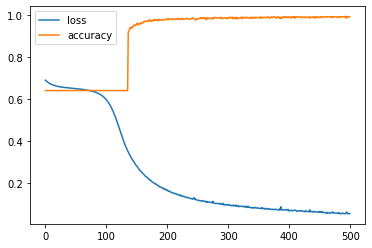

In [122]:
#La gráfica de Funcion de Costo
pd.DataFrame(grafica1.history).plot()

###Pregunta5

In [98]:
"""
Crea una función que aplane la ruta de una imágen
"""
from PIL import Image
import matplotlib.pyplot as plt


def AplanadorDeImagen (ruta):
  img = plt.imread(ruta)
  img_vector = img.flatten() 
  return img_vector

ruta='/DZ23SCXP4ZGWRPSWN6DB7Q356U.jpg'
Foto = AplanadorDeImagen(ruta)

print(Foto.shape)

(4320000,)
